# EDA and Statistical Analysis of Credit Card Dataset

## PART-A


In [1]:
# The following are the Ages of CEOs of 42 Top Fortune 500 Companies when they took over the post of CEO
# 57 61 57 57 58 57 61 54 68
# 51 49 64 50 48 65 52 56 46
# 54 49 50 47 55 55 54 42 51
# 56 55 54 51 60 62 43 55 56
# 61 52 69 64 46 54
# Use this data for answering following questions where relevant.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [32]:
c_ages=pd.Series([ 57, 61, 57,57, 58, 57, 61, 54, 68,51, 49, 64, 50, 48, 65, 52, 56, 46,54, 49, 50, 47, 55, 55, 54, 42, 51,56, 55, 54, 51, 60, 62, 43, 55, 56,
 61, 52, 69, 64, 46, 54])

# Q1. Compute the mean, median and the mode of the data


In [4]:
mean=c_ages.mean()
median=c_ages.median()
mode=c_ages.mode()


In [5]:
print('Mean:',mean)
print('Median:',median)
print('mode:',mode)

Mean: 54.904761904761905
Median: 55.0
mode: 0    54
dtype: int64


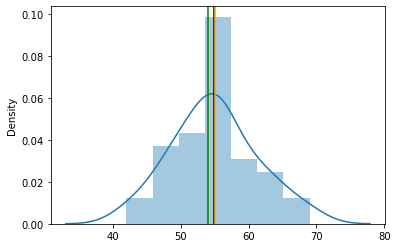

In [6]:
sns.distplot(c_ages)
plt.axvline(c_ages.mean(),color='black')
plt.axvline(c_ages.median(),color='orange')
plt.axvline(c_ages.mode()[0],color='green')

# Q2. Compute the range , variance and standard deviation of CEO ages


In [7]:

c_ages.describe()

count    42.000000
mean     54.904762
std       6.281252
min      42.000000
25%      51.000000
50%      55.000000
75%      57.750000
max      69.000000
dtype: float64

In [8]:
#  By observing minimum and maximum we can get range between 42 and 69
#  Standadrd Deviation is 6.28

In [9]:
# Variance:
(c_ages).var()

39.4541231126597

In [10]:
# Variance = 39.45

# Q3. Find the mean deviation for the data . The mean deviation is defined as below.

In [11]:
abs(c_ages-c_ages.mean()).sum()/len(c_ages)

4.814058956916099

In [12]:

my_list = [57, 61, 57,57, 58, 57, 61, 54, 68,51, 49, 64, 50, 48, 65, 52, 56, 46,54, 49, 50, 47, 55, 55, 54, 42, 51,56, 55, 54, 51, 60, 62, 43, 55, 56,
 61, 52, 69, 64, 46, 54]

my_mean = sum(my_list) / len(my_list)
my_variance = sum([(abs(x - my_mean)) for x in my_list]) / len(my_list)
print(my_variance)


4.814058956916099


# 4. Calculate the Pearson coefficient of skewness and comment on the skewness of the data

In [13]:
3*(c_ages.mean()-c_ages.median())/c_ages.std()

-0.04548683903435661

<AxesSubplot:ylabel='Density'>

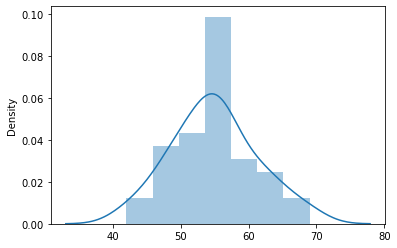

In [14]:
sns.distplot(c_ages)

In [15]:
# From given observation we can say that data is little bit negatively skewed

In [16]:
# The value of the coefficient if skewness usually ranges from –3 to 3. When the
# distribution is symmetric, the coefficient is zero; when the distribution is positively 
# skewed , the coefficient is positive, and when the distribution is negatively skewed 
# the coefficient is negative.

# Q5. Count the number of data values that fall within two standard deviations ofthe mean. Compare this with the answer from Chebyshev’s Theorem.


In [17]:
# mean + 2*std =

upper_value_within_two_std=c_ages.mean()+(2*(c_ages.std()))

# mean - 2*std =

lower_value_within_two_std=c_ages.mean()-(2*(c_ages.std()))

In [18]:
upper_value_within_two_std

67.46726533563263

In [19]:
lower_value_within_two_std

42.34225847389118

Text(0.5, 1.0, 'Distribution of original data')

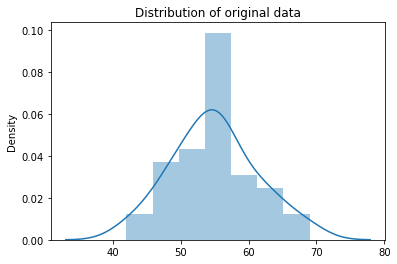

In [20]:

sns.distplot(c_ages)
plt.title("Distribution of original data")

In [21]:
len(c_ages)

42

In [22]:
c = c_ages[(c_ages>lower_value_within_two_std)&(c_ages<upper_value_within_two_std)]

Text(0.5, 1.0, 'Distribution of data between two std')

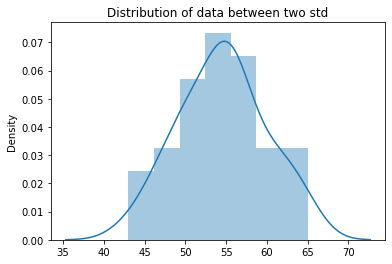

In [23]:
sns.distplot(c)
plt.title("Distribution of data between two std")

In [24]:
len(c)

39

In [25]:
# Compare this with the answer from Chebyshev’s Theorem.

In [26]:
# According to  Chebyshev’s Theorem at least (1-1/k**2)% data should fall between c_ages.mean()+(2*(c_ages.std())) and c_ages.mean()+(2*(c_ages.std()))
# where k is number of std deviation here it is 2
1-(1/2**2)

0.75

In [27]:
# Therefore atleast 75% that is >=75% data must fall between 2 standard deviations

In [28]:
# we will calculate percent of data falling between 2 std
39/42

0.9285714285714286

In [29]:
# we can see that nearly 93% data is falling between 2std which is >=75% t

In [30]:
# Chebyshev's theorem applies to all data sets (applies on any ditribution), whereas the empirical rule is only appropriate when the data have approximately a symmetric and bell-shaped distribution.

# Q6. Find the three quartiles and the interquartile range (IQR)

In [31]:
Quartile_25=c_ages.quantile(0.25)

In [32]:
Quartile_50=c_ages.quantile(0.50)

In [33]:
Quartile_75=c_ages.quantile(0.75)

In [34]:
Interquartile_range = Quartile_75-Quartile_25

In [35]:
Interquartile_range

6.75

# Q7. Are there any outliers in the data set ?

In [36]:
# we can find outliers in dataset using IQR

In [37]:
upper_limit=Quartile_75+(1.5*(Interquartile_range))

In [38]:
lower_limit=Quartile_25-(1.5*(Interquartile_range))

In [39]:
upper_limit

67.875

In [40]:
lower_limit

40.875

In [41]:
for i in c_ages:
    if (i>upper_limit) or (i<lower_limit):
        print(i)

68
69


In [42]:
# outliers are present in data set

# Q8. Draw a boxplot of the dataset to confirm .

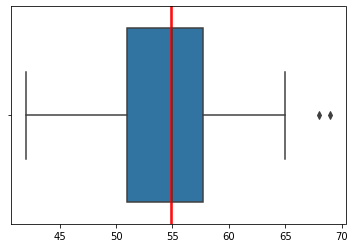

In [43]:
sns.boxplot(c_ages)
plt.axvline(c_ages.mean(),color='r')
plt.axvline(c_ages.median(),color='r')

# Q9. Find the percentile rank of the datapoint 50.

In [44]:
ra=pd.DataFrame(c_ages, columns=['age'])

In [45]:
ra['Percentile Rank'] = ra.age.rank(pct = True)

In [46]:
ra

,age,Percentile Rank
0,57,0.702381
1,61,0.833333
2,57,0.702381
3,57,0.702381
4,58,0.761905
5,57,0.702381
6,61,0.833333
7,54,0.428571
8,68,0.976190
9,51,0.285714


In [47]:
ra[ra.age==50]

,age,Percentile Rank
12,50,0.22619
20,50,0.22619


In [48]:
# percentile rank of 50 is 0.22

# Q10. What is the probability that a person becoming a CEO is below 50 yearsof age ?


In [23]:
import scipy.stats as stats


In [34]:
stats.norm.cdf(50,loc=c_ages.mean(),scale=c_ages.std())

0.21744318383652284

In [51]:
c_ages

0     57
1     61
2     57
3     57
4     58
5     57
6     61
7     54
8     68
9     51
10    49
11    64
12    50
13    48
14    65
15    52
16    56
17    46
18    54
19    49
20    50
21    47
22    55
23    55
24    54
25    42
26    51
27    56
28    55
29    54
30    51
31    60
32    62
33    43
34    55
35    56
36    61
37    52
38    69
39    64
40    46
41    54
dtype: int64

# Q11. Create a frequency distribution for the data and visualize it appropriately

<AxesSubplot:>

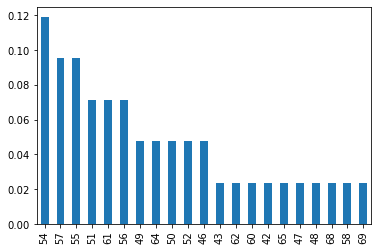

In [35]:
c_ages.value_counts(normalize=True).plot(kind='bar')

<AxesSubplot:ylabel='Density'>

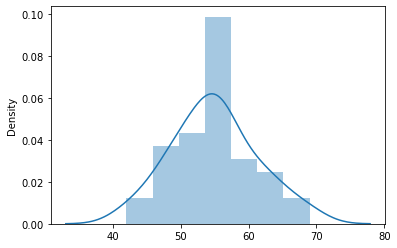

In [36]:
sns.distplot(c_ages)

# Q12. Create a probability distribution of the data and visualize it appropriately

In [37]:

def prob (data):
    l=[]
    for i in data:
        a=len(data[data==i])/len(data) 
        l.append(a)
   
    return sns.distplot(l)

<AxesSubplot:ylabel='Density'>

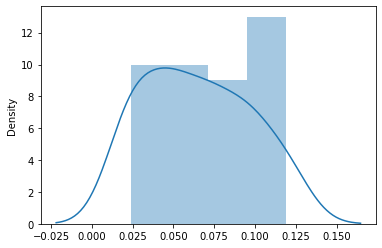

In [26]:
prob(c_ages)

In [38]:
m=c_ages.mean()
std=c_ages.std()

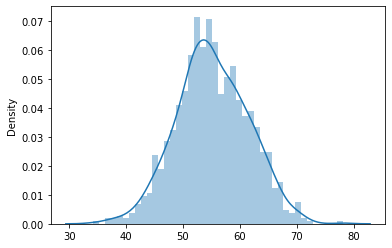

In [39]:

# import packages
# import scipy.stats as stats
# import seaborn as sns
# import matplotlib.pyplot as plt
 
 

data =stats.norm(scale=std, loc=m).rvs(1000)
 
# plotting a distplot
ax = sns.distplot(data,bins=42)

 
plt.show()

# Q13. What is the shape of the distribution of this dataset? 

# Create an appropriate graph to determine that. Take 100 random samples with replacement from this dataset of  size 5 each. Create a sampling distribution of the mean age of CEOS. 
# Compare with other sampling distributions of sample size 10, 15, 20, 25, 30. State your observations. 

# Does it corroborate the Central Limit Theorem?


<AxesSubplot:ylabel='Density'>

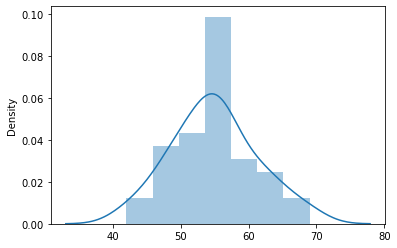

In [40]:
# shape of distribution
sns.distplot(c_ages)


In [42]:
import random
# random.choices(c_ages,k=5)

<AxesSubplot:ylabel='Density'>

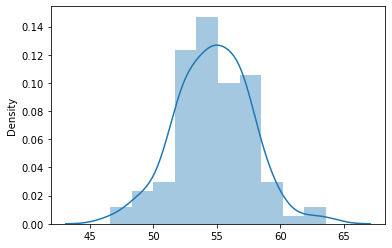

In [43]:
# Appropriate graph to determine that. Take 100 random samples with replacement from this dataset of size 5 each.
c=0
lst=[]
while(c<100):
    a=random.choices(c_ages,k=5)
    lst.append(sum(a)/len(a))
    c+=1

sns.distplot(lst)

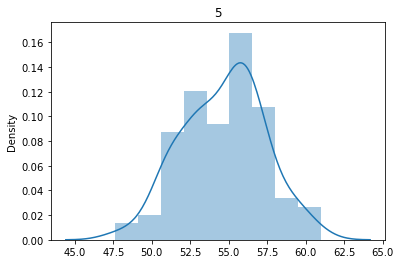

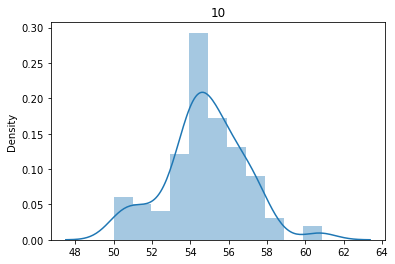

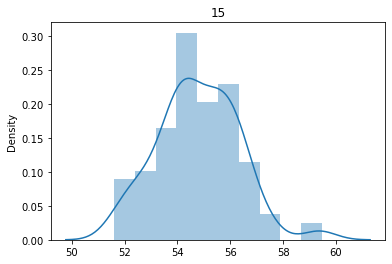

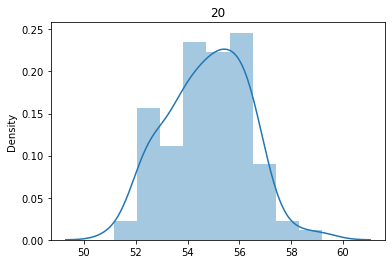

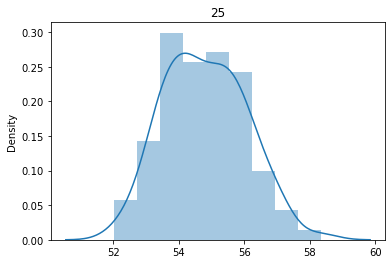

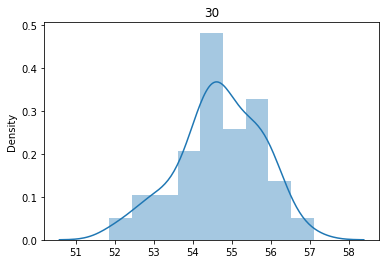

In [44]:



sample_sizes=[5,10,15,20,25,30]
r=6
col=1
it=1
for i in sample_sizes:
    lst=[]
    for j in range (1,101):
           
            a=random.choices(c_ages,k=i)
            lst.append(sum(a)/len(a))
             
    sns.distplot(lst)
    plt.title(i)
    plt.show()
             

In [27]:
### By obeserbing above distributions we can say that all distributions are nearly normal where 
### they are following Central Limit Theorem

# Q14. Treat this dataset as a binomial distribution where p is the probability that a  person becomes a CEO above 50 years age. What is the probability that out of a random sample of 10 CEOs of Fortune 500 companies exactly 6 are above 50 years of age?

In [60]:
stats.binom.pmf(k=6,n=10,p=0.6)

0.2508226559999998

# Q15. A study claims that 25% of all Fortune 500 companies becoming a CEOare above 60 years of age. Using the Normal approximation of a Binomial distribution, find the  probability that in a random sample of 300 Fortune 500 companies exactly 75 CEOs will be above 50 years of age.
## [ Note that the normal distribution can be used to approximate a binomial distribution if np>=5 and nq>=5 with the following correction for continuity P(X=z) = P(z-0.5 < X < z+0.5 ) ]


In [45]:
k=75
n=300
p=0.25
stats.binom.pmf(k,n,p)

0.0531283151571921

# Q16. Compute a 95% Confidence Interval for the true mean age of the population of  CEOs for the given dataset using appropriate distribution.
## ( Statereasons as to why did you use a z or t distribution)


In [47]:
# we will use z here as n >30
m=c_ages.mean()
alpha = 1-0.95
alpha_by_two=alpha/2

sigma=c_ages.std()
n=len(c_ages)

z_alpha=stats.norm.isf(alpha_by_two)

upper_interval_value= m+((z_alpha*(sigma/(n**0.5))))
lower_interval_value= m-((z_alpha*(sigma/(n**0.5))))

In [62]:
print(upper_interval_value,lower_interval_value)

56.804394633951055 53.005129175572755


In [61]:
stats.t.interval(alpha=0.95,loc=m,scale=sigma/np.sqrt(n),df=n-1)

(52.94738608388915, 56.86213772563466)

In [62]:
stats.norm.interval(alpha=0.95,
                 loc=np.mean(c_ages),
                 scale=c_ages.std()/np.sqrt(n))

(53.005129175572755, 56.804394633951055)

# Q17. A data scientist wants to estimate with 95% confidence the proportion ofCEOs of Fortune 500 companies are above 60 years in the population.
# Another recent study showed that 25% of CEOs interviewed were above 60. The data scientist wants to be accurate within 2% of the true proportion. Find the minimum sample size necessary

In [63]:
# Here we will use Margin of error Formula = z*((pq/n)**2) and  will find value of n 
# margin of error(me) is already given i.e (2%) i.e. 0.02
# q=(1-p)
# alpha=0.05
# z_alpha_by_two= stats.norm.isf(0.025)
# p=0.25

In [63]:
p=0.25
q=1-p
z_alpha_by_two= stats.norm.isf(0.025)
me=0.02

n=((z_alpha_by_two/me)**2) * (p*q)            

In [64]:
n

1800.6838222003723

In [66]:
# 1800 is the sample size required

# Q18. The same data scientist wants to estimate the true proportion of CEOs ascending to the post and above 60 years. She wants to be 90% confident and accurate within 5% of true proportion. Find the minimum sample size necessary.

In [67]:
# Here we will use Margin of error Formula = z*((pq/n)**2) and  will find value of n 
# margin of error(me) is already given i.e (5%) i.e. 0.05

In [68]:
p=0.25
q=1-p
z_alpha_by_two= stats.norm.isf(0.05)
me=0.05

n=((z_alpha_by_two/me)**2) * (p*q)

In [69]:
n

202.9157590571561

In [70]:
# 203 is the sample size required

# 19. A researcher claims that currently 25% of all CEOS are above 60 years .Test his claim with an alpha =0.05 if out of a random sample of 30 CEOs only10 are above 60 years.

In [71]:
# H0 : p=0.25
# H1 : p<>0.25
# This is two tailed test
alpha_by_two=0.025
t_alpha_by_two=stats.norm.isf(0.025)
p_cap=0.33
p=0.25
q=1-p
n=30
t_statistic=(p_cap-p)/(((p*q)/n)**0.5)

In [19]:
t_statistic

1.0084435261263631

In [73]:
t_alpha_by_two

1.9599639845400545

In [74]:
# we can say our value of t_statistics is NOT IN rejection zone
# Hence We Accept Null Hypothesis and Claim of researcher is true

In [75]:
# P_VALUE

In [78]:
p_val_t_statistic=stats.norm.sf(t_statistic)
p_val_t_statistic

0.15578603665720425

In [80]:
p_val_t_statistic_multiply_by_two = p_val_t_statistic*2
p_val_t_statistic_multiply_by_two

0.3115720733144085

In [ ]:
alpha=0.05

In [ ]:
# As we can see tha that  p_val_t_statistic_multiply_by_two (0.3115) is greater than alpha (0.05) 
# hence we accept the Null Hypothesis

# Q20. Assume you are a data scientist for the Fortune 500 companies. You are asked  to research the question whether the CEO ages of UK are on average older than the CEO ages of Americans. 
# You take a random sample of 40 CEO ages from America and UK and the data is as follows:


### a. What are your hypotheses?
### b. What significance level will you use?
### c. What statistical test will you use?
### d. What are the test results? (Assume s1 = 8.8 and s2= 7.8.)
### e. What is your decision?
### f. What can you conclude?
### g. Do you feel that using the data given really answers the original question asked?
### h. What other data might be used to answer the question?

In [24]:
UK=pd.Series([47, 49, 73, 50, 65, 70, 49, 47, 40, 43,46 ,35, 38, 40, 47, 39, 49, 37, 37, 36,40, 37, 31, 48, 48, 45, 52, 38, 38, 36,
44, 40, 48, 45, 45, 36, 39, 44, 52, 47])
USA=pd.Series([47 ,57, 52, 47, 48, 56, 56, 52, 50, 40,46, 43, 44, 51, 36, 42, 49, 49, 40, 43,39, 39, 22, 41, 45, 46, 39, 32, 36, 32,
32, 32,37, 33, 44, 49, 44, 44, 49, 32])



In [25]:
# Hypothesis

# H1 : uk.mean > usa.mean
# H0 : uk.mean <=usa.mean

In [117]:
# b. What significance level will you use?

# The significance level is typically set equal to such values as 0.10, 0.05, and 0.01. 
#The 5 percent level of significance, that is, , has become the most common in practice.

In [5]:


# Here we will use Right Tail test


In [5]:
stats.levene(UK,USA,center='median')

LeveneResult(statistic=0.020083022437076308, pvalue=0.8876708478111702)

In [6]:
# AS VARIANCES ARE EQUAL WE WILL USE 

In [26]:
# What are the test results? (Assume s1 = 8.8 and s2= 7.8.)
n1=len(UK)
n2=len(USA)
print(n1,n2)

40 40


In [27]:
uk_avg=UK.mean()

In [28]:
usa_avg=USA.mean()

In [10]:
# d. What are the test results? (Assume s1 = 8.8 and s2= 7.8.)
s1_sq=(8.8**2)
s2_sq=(7.8**2)

In [55]:
sp = np.sqrt((((n1-1)*s1_sq)+((n2-1)*s2_sq))/ (n1+n2-2))

In [56]:
sp

8.315046602394961

In [57]:
na=sp*(np.sqrt((1/n1)+(1/n2)))

In [58]:
t_stati=(uk_avg-usa_avg)/na
t_stati

1.0084435261263633

In [59]:
p_val=stats.t.sf(t_stati,df=n1+n2-2)
p_val


0.15817987687093638

In [60]:
p_val=stats.t.sf(t_stati,df=(n1-1)+(n2-1))
p_val

0.15817987687093638

In [36]:
import scipy.stats as stats

In [37]:
t_val_of_alpha=stats.norm.isf(0.05)
t_val_of_alpha

1.6448536269514729

In [116]:
# as we can see that value of t_statistic not fall in rejection zone hence Null Hypothesis is Accepted

In [140]:
stats.ttest_ind(a=UK, b=USA,equal_var=True)

Ttest_indResult(statistic=1.0018742016808726, pvalue=0.3195023563852081)

In [39]:
stats.ttest_ind(a=UK, b=USA)

Ttest_indResult(statistic=1.0018742016808726, pvalue=0.3195023563852081)

# PART-B ( Dataset Based)--25 points
### Topic - Credit Card Fraud Detection
### Introduction
### It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.


# 1. Import the dataset and view the first 10 rows of it.


In [3]:
df=pd.read_csv('creditcard.csv')
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


# 2. Display shape/dimension of the dataset.

In [4]:
df.shape

(284807, 31)

# 3. Check for the missing values.Display number of missing values per column.

In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# 4. Check the datatype, number of non-null values and name of each variable in the dataset.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# 5. Check if there are any non-real characters in the dataset.

In [144]:
df.applymap(np.isreal).count()

Time      284807
V1        284807
V2        284807
V3        284807
V4        284807
V5        284807
V6        284807
V7        284807
V8        284807
V9        284807
V10       284807
V11       284807
V12       284807
V13       284807
V14       284807
V15       284807
V16       284807
V17       284807
V18       284807
V19       284807
V20       284807
V21       284807
V22       284807
V23       284807
V24       284807
V25       284807
V26       284807
V27       284807
V28       284807
Amount    284807
Class     284807
dtype: int64

# 6. Check the descriptive statistics of the dataset.

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# 7. Check the number of fraudulent transactions in the dataset and visualizeusing  pie chart and bar plot.

In [8]:
#  Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.
len(df[df.Class==1])

492

In [ ]:
# There are  492 fraudulent transactions in dataset

In [9]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

<AxesSubplot:>

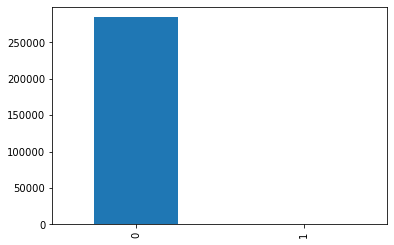

In [10]:
df.Class.value_counts().plot(kind='bar')


<AxesSubplot:xlabel='Class', ylabel='count'>

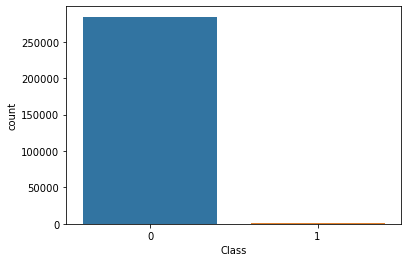

In [90]:
sns.countplot(df.Class)

Text(0.5, 1.0, 'pie chart for fraudlunt and non fraudlant transactions')

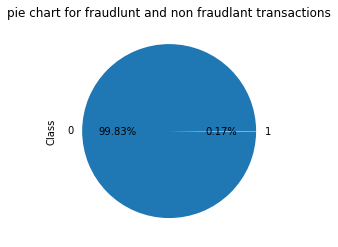

In [11]:
df['Class'].value_counts().plot(kind='pie',autopct='%.2f%%')
plt.title('pie chart for fraudlunt and non fraudlant transactions')

In [ ]:
# There are only around 0.17% fraudlunt transactions

# 8. Check the maximum and minimum fraudulent amount.

In [12]:
df['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [ ]:
# min of fraudulent amount: 0.0 
# max of fraudulent amount: 25691.16

# 9. Check the number of transactions where the transaction amount is zero and consider as a fraud transaction.

In [13]:
df[df.Amount==0]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
383,282.0,-0.356466,0.725418,1.971749,0.831343,0.369681,-0.107776,0.751610,-0.120166,-0.420675,...,0.020804,0.424312,-0.015989,0.466754,-0.809962,0.657334,-0.043150,-0.046401,0.0,0
514,380.0,-1.299837,0.881817,1.452842,-1.293698,-0.025105,-1.170103,0.861610,-0.193934,0.592001,...,-0.272563,-0.360853,0.223911,0.598930,-0.397705,0.637141,0.234872,0.021379,0.0,0
534,403.0,1.237413,0.512365,0.687746,1.693872,-0.236323,-0.650232,0.118066,-0.230545,-0.808523,...,-0.077543,-0.178220,0.038722,0.471218,0.289249,0.871803,-0.066884,0.012986,0.0,0
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.0,1
575,430.0,-1.860258,-0.629859,0.966570,0.844632,0.759983,-1.481173,-0.509681,0.540722,-0.733623,...,0.268028,0.125515,-0.225029,0.586664,-0.031598,0.570168,-0.043007,-0.223739,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283719,171817.0,-0.750414,0.904175,0.996461,0.427284,1.720336,0.929256,0.794272,0.176719,-1.836261,...,0.050750,0.115532,-0.623995,-0.186896,0.733759,2.558151,-0.188835,0.001654,0.0,0
283782,171870.0,2.083677,-0.065811,-1.442870,0.135416,0.043035,-1.306975,0.335835,-0.371635,0.730560,...,-0.147536,-0.246599,0.194758,-0.082277,0.012887,-0.069278,-0.048995,-0.065482,0.0,0
283949,172027.0,2.132569,-0.057836,-1.724522,-0.030326,0.412146,-0.903088,0.345843,-0.348132,0.722638,...,-0.188739,-0.343876,0.105024,-0.763831,0.117381,-0.027682,-0.047514,-0.071700,0.0,0
284085,172140.0,-2.210521,-1.039425,0.189704,-1.291932,3.742120,-1.665061,3.120388,-2.324089,0.364926,...,-0.286359,1.326003,-0.361764,-0.268117,1.051309,0.334629,-1.930149,-0.899888,0.0,0


In [14]:
# there are 1825 transactions where transaction amount is zero
# if we consider zero amount transactions as fraud transaction then there are 1825 such transactions

# 10. Check the distribution of columns. 
#  List down columns that are normally distributed.
# List down columns that are not normally distributed.

In [15]:
cols=df.select_dtypes(include=np.number).columns
cols

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

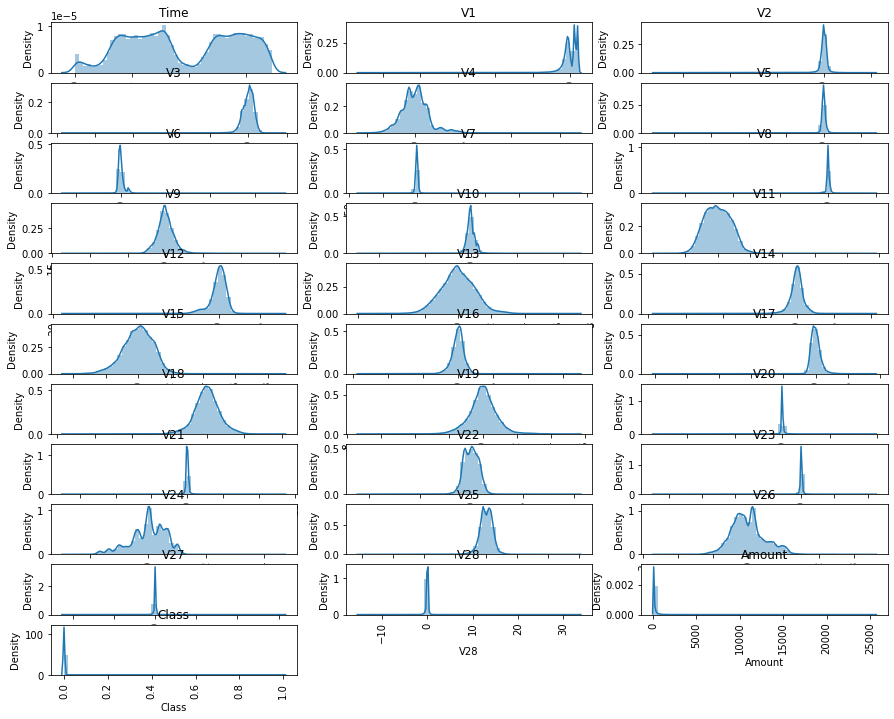

In [94]:
cols=['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class']
rows=11
columns=3
iterator=1
plt.figure(figsize=(15,12))
for i in cols:
    plt.subplot(rows,columns,iterator)
    sns.distplot(df[i])
    plt.title(i)
    iterator=iterator+1
    plt.xticks(rotation=90)
    
plt.tight_layout()    
plt.show()

In [ ]:
# Normally distributed columns:

In [16]:
cols=['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class']
for i in cols:
      if df[i].skew()==0:
              print(i)

In [105]:
# There are no such columns where skew is perfectly equal to zero

In [100]:
# Moderately distributed columns :

In [17]:
cols=['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class']
for i in cols:
     if (df[i].skew()<0.5) and (df[i].skew()>-0.5):
            print(i)

Time
V11
V13
V15
V18
V19
V22
V25


In [ ]:
# Not Normaly distributed columns :

In [18]:
cols=['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class']
for i in cols:
     if (df[i].skew()>1) or (df[i].skew()<-1):
            print(i)

V1
V2
V3
V5
V6
V7
V8
V10
V12
V14
V16
V17
V20
V21
V23
V27
V28
Amount
Class


# 11. List down columns that are highly skewed.

In [ ]:
# A skewness value greater than 1 or less than -1 indicates a highly skewed distribution. 
# A value between 0.5 and 1 or -0.5 and -1 is moderately skewed. 
# A value between -0.5 and 0.5 indicates that the distribution is fairly symmetrical.

In [20]:
# Highly skwed columns
cols=['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class']
for i in cols:
     if (df[i].skew()>1) or (df[i].skew()<-1):
            print(i,df[i].skew())

V1 -3.2806673027560405
V2 -4.624865573285336
V3 -2.2401554402404193
V5 -2.425901495952054
V6 1.826580664998085
V7 2.553907417429514
V8 -8.521944194777976
V10 1.1871405899625278
V12 -2.278400935410618
V14 -1.9951758402683304
V16 -1.100966276051066
V17 -3.8449144738706202
V20 -2.037155299081399
V21 3.5929911930778453
V23 -5.875140340106818
V27 -1.1702089424327133
V28 11.19209119221281
Amount 16.977724453761024
Class 23.99757931064749


# 12. With the help of a standard scaler, normalize the respective column distribution

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
ss=StandardScaler()

In [114]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [23]:
scaled_df=ss.fit_transform(pd.DataFrame(df))

In [24]:
scaled_df=pd.DataFrame(scaled_df,columns=df.columns)
scaled_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964,-0.041599
1,-1.996583,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475,-0.041599
2,-1.996562,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,...,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686,-0.041599
3,-1.996562,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,...,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534,-0.041599
4,-1.996541,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,...,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403,-0.041599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.641931,-6.065842,6.099286,-6.486245,-1.459641,-3.886611,-1.956690,-3.975628,6.116573,1.742559,...,0.290602,0.154146,1.624574,-0.841000,2.756320,0.518500,2.337901,2.495529,-0.350151,-0.041599
284803,1.641952,-0.374121,-0.033356,1.342145,-0.521651,0.629040,0.794446,0.019667,0.246886,0.532299,...,0.291625,1.273781,0.019958,-1.677920,-1.163726,-0.819647,0.169641,-0.162164,-0.254117,-0.041599
284804,1.641974,0.980024,-0.182434,-2.143205,-0.393984,1.905833,2.275262,-0.239939,0.593140,0.393630,...,0.315913,0.796788,-0.060053,1.056944,0.509797,-0.181182,0.011037,-0.080467,-0.081839,-0.041599
284805,1.641974,-0.122755,0.321250,0.463320,0.487192,-0.273836,0.468155,-0.554672,0.568631,0.356887,...,0.361112,1.102451,-0.261503,0.203428,-1.091855,1.133635,0.269604,0.316687,-0.313249,-0.041599


# 13. List down columns that have high kurtosis.

In [25]:
from scipy.stats import kurtosis

In [26]:
cols=['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class']
for i in cols:
     if (kurtosis(df[i],fisher=False)>3):
            print(i,(kurtosis(df[i],fisher=False)))

V1 35.4860880940827
V2 98.77140353674743
V3 29.61906241570396
V4 5.6353875806990965
V5 209.90090654357923
V6 45.6417242785053
V7 408.6002752348412
V8 223.5830800079826
V9 6.731224041689352
V10 34.987656137959824
V11 4.633871506404596
V12 23.2414932359798
V13 3.19527529239144
V14 26.879021558354037
V15 3.284743017626939
V16 13.418927339073315
V17 97.79803376532578
V18 5.578274502429481
V19 4.7249184314171355
V20 274.01133401632086
V21 210.28338022529644
V22 5.83289571494525
V23 443.0809115603964
V24 3.6188388684828054
V25 7.290315895267902
V26 3.918968570300974
V27 247.98491855118766
V28 936.3810946181532
Amount 848.0777883188754
Class 576.8777467351637


# 14. What is the distribution of Time and Amount columns in the dataset ?

Text(0.5, 1.0, 'Time')

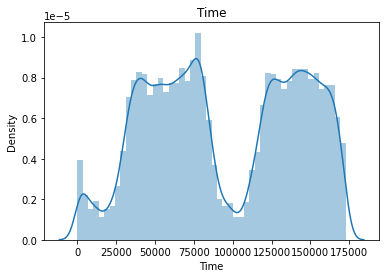

In [27]:
sns.distplot(df['Time'])
plt.title('Time')

In [146]:
df.Time.mode()

0    163152.0
Name: Time, dtype: float64

In [149]:
df['Time'].skew()

-0.0355676180063216

In [150]:
#  We can say thay distribution of Time is little bit negatively skewed

Text(0.5, 1.0, 'Amount')

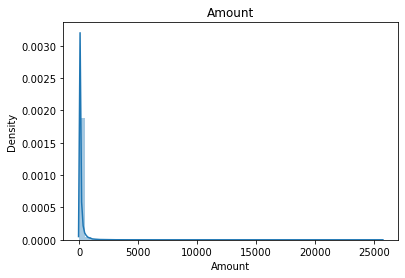

In [28]:
sns.distplot(df['Amount'])
plt.title('Amount')

In [147]:
df['Amount'].skew()

16.977724453761024

In [151]:
#  We can say thay distribution of Amount is very Highly Right skewed

# 15. Find the distribution of all variables with respect to the outcome ‘Class’ variable.

In [ ]:
cols=['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'
       ]
row=16
col=2
iterator=1
for i in cols:
    plt.subplot(row,col,iterator)
    sns.barplot(df.loc[:,i],df['Class'])
    plt.title(i)
    plt.xticks(rotation=90)
    iterator+=1
plt.tight_layout()
plt.show()

# 16. Create a countplot for the outcome class in seaborn using percentage instead of count for each bar.

<AxesSubplot:>

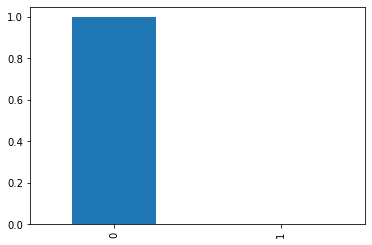

In [29]:
df.Class.value_counts(normalize=True).plot(kind='bar')

<AxesSubplot:xlabel='Class', ylabel='count'>

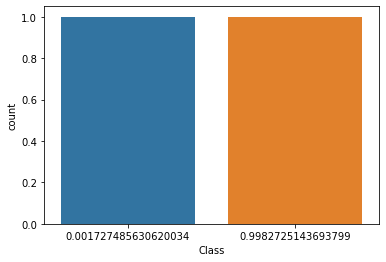

In [41]:
sns.countplot(df.Class.value_counts(normalize=True))

# 17. Plot a heatmap for correlation matrix for the given dataset. Write the Observation. Especially note down columns that are highly correlated
# (Positive and Negative Correlation, Consider 0.7 to 1 as high).

<AxesSubplot:>

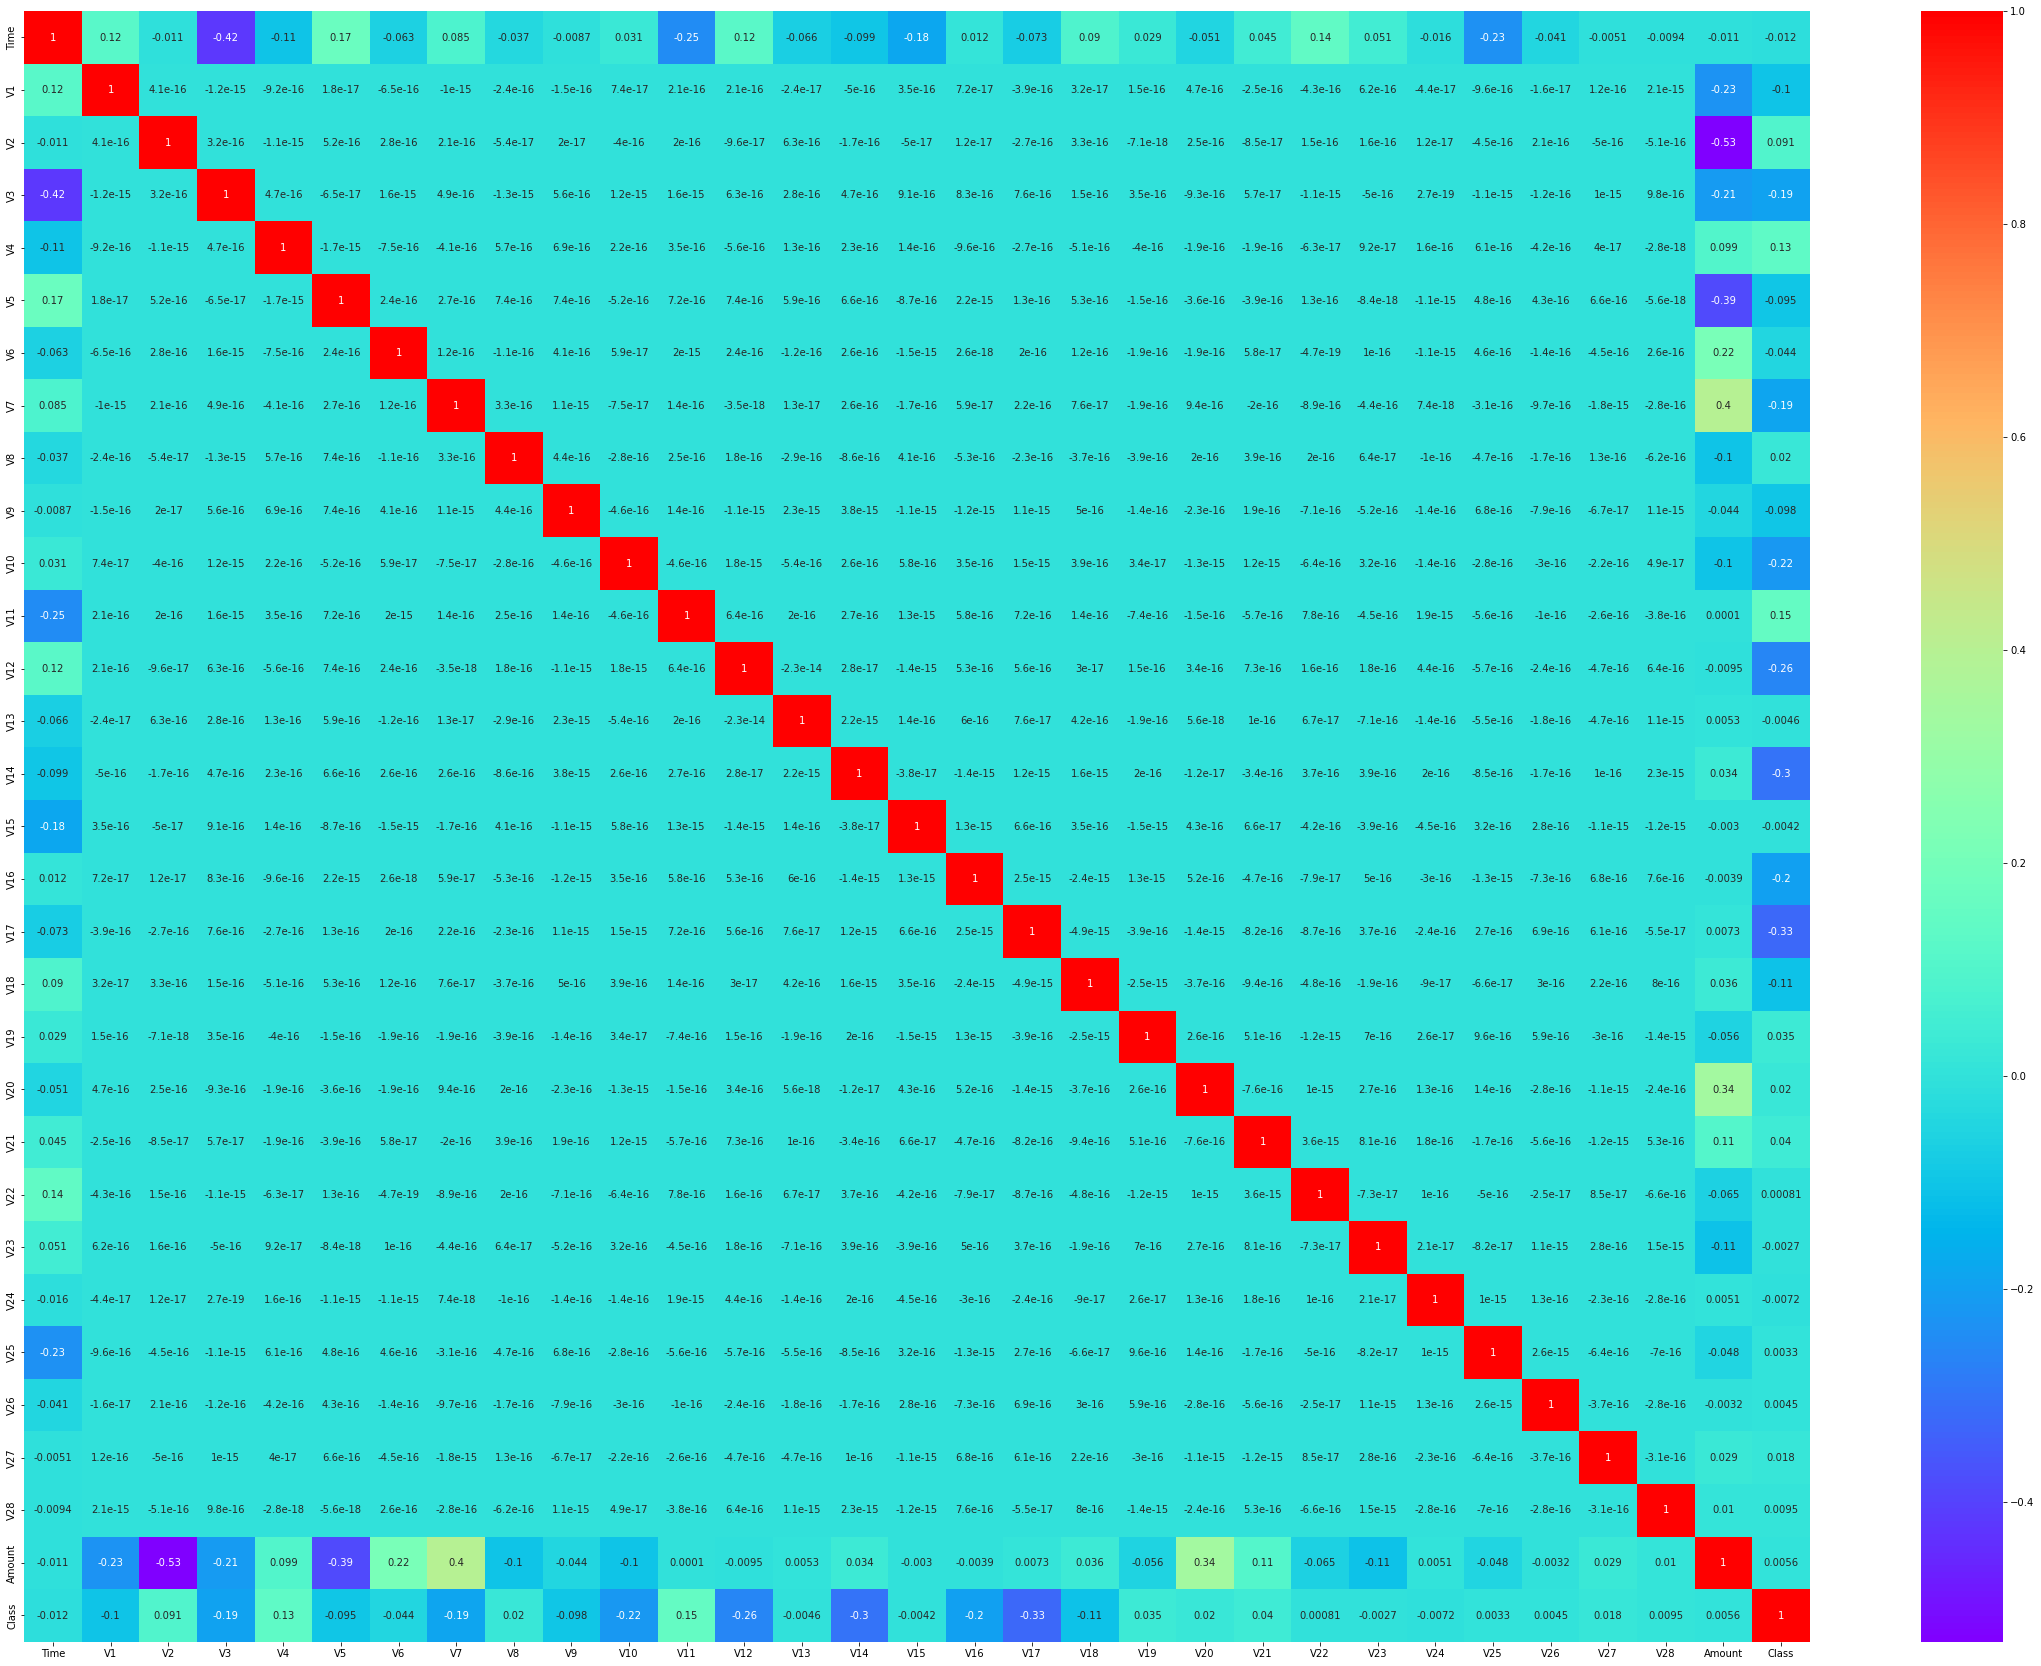

In [39]:
plt.figure(figsize=(40,30))
sns.heatmap(df.corr(),annot=True,cmap='rainbow')

In [40]:
df.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


# 18. With the help of hypothesis testing check whether fraudulent transactions of higher value than normal transactions?

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [11]:
fraud=df.loc[df.Class==1]['Amount']
normal=df.loc[df.Class==0]['Amount']

In [14]:
# H1: fraud>norm
# H0: fraud<=norm
# this is right tail test

In [21]:
stats.levene(fraud,normal)

LeveneResult(statistic=12.684214894874506, pvalue=0.0003688154902664781)

In [22]:
stats.ttest_ind(fraud,normal,equal_var=False,alternative='greater')

Ttest_indResult(statistic=2.928789530856467, pvalue=0.0017802594258551495)

In [24]:
# As pval is less than alpha we reject null hypothesis hence fraudulent transactions of higher value than normal transactions

In [16]:
fmean=fraud.mean()
nmean=normal.mean()

In [17]:
fstd=fraud.std()
nstd=normal.std()

In [26]:
fstd_sq=fstd**2
nstd_sq=nstd**2

In [28]:
n1=len(fraud)
n2=len(normal)

In [25]:
import scipy.stats as stats
# we will consider 0.05 as alpha
z_alpha=  stats.norm.isf(0.05)
z_alpha

1.6448536269514729

In [31]:
t_stat=(fmean-nmean)/np.sqrt((fstd_sq/n1)+(nstd_sq/n2))
t_stat

2.9287895308614313

In [33]:
pv=stats.t.sf(t_stat,df=(n1+n2-2))
pv

0.0017015585308323678

In [34]:
# as pv is less than 0.05 we rejct null hypothesis

# 19. Perform ANOVA test for Statistical feature selection.

In [37]:

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [40]:
X=df.drop('Class',axis=1)
y=df['Class']

In [57]:

fvalue_Best = SelectKBest(f_classif, k=14)
X_kbest = fvalue_Best.fit_transform(pd.DataFrame(X), pd.DataFrame(y))
print(pd.DataFrame(X_kbest))

print('Original number of features:', X.shape)
print('Reduced number of features:', X_kbest.shape)

               0          1         2         3         4         5   \
0       -1.359807  -0.072781  2.536347  1.378155 -0.338321  0.239599   
1        1.191857   0.266151  0.166480  0.448154  0.060018 -0.078803   
2       -1.358354  -1.340163  1.773209  0.379780 -0.503198  0.791461   
3       -0.966272  -0.185226  1.792993 -0.863291 -0.010309  0.237609   
4       -1.158233   0.877737  1.548718  0.403034 -0.407193  0.592941   
...           ...        ...       ...       ...       ...       ...   
284802 -11.881118  10.071785 -9.834783 -2.066656 -5.364473 -4.918215   
284803  -0.732789  -0.055080  2.035030 -0.738589  0.868229  0.024330   
284804   1.919565  -0.301254 -3.249640 -0.557828  2.630515 -0.296827   
284805  -0.240440   0.530483  0.702510  0.689799 -0.377961 -0.686180   
284806  -0.533413  -0.189733  0.703337 -0.506271 -0.012546  1.577006   

              6         7         8         9         10        11        12  \
0       0.363787  0.090794 -0.551600 -0.617801 -0.31116

In [61]:
# if we want names of columns

In [59]:
sel_=SelectKBest(f_classif,k=14).fit(X,y)

In [60]:
X.columns[sel_.get_support()]

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V7', 'V9', 'V10', 'V11', 'V12', 'V14',
       'V16', 'V17', 'V18'],
      dtype='object')

# 20. Split the dataset randomly into train and test datasets. Use a train -test ratio of 70:30 ratio.

In [44]:
from sklearn.model_selection import train_test_split

In [46]:
X=df.drop('Class',axis=1)
y=df['Class']

In [52]:
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [47]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=0)

In [55]:
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
161145,113921.0,-0.132066,0.107044,-0.650588,-0.996032,1.814333,1.740740,0.496852,0.633016,0.017181,...,-0.062612,-0.062489,0.005292,0.251519,-2.466810,-0.889690,0.337462,0.306395,0.074817,47.89
204520,135319.0,2.125994,0.014207,-1.514760,0.115021,0.598510,-0.333235,0.199289,-0.264353,0.384111,...,-0.086076,-0.329368,-0.788150,0.267730,0.066122,-0.135785,0.203841,-0.068267,-0.057678,1.98
182659,125498.0,-0.086694,0.166240,1.573127,0.687266,0.222359,1.102606,1.575093,-1.098608,0.763887,...,0.052960,0.015324,1.063663,-0.410841,0.722723,-0.171733,-0.613543,-1.201571,-1.139931,170.10
25117,33520.0,1.352339,-0.534984,0.555143,-0.629355,-1.144170,-0.852967,-0.642128,-0.032659,-0.654482,...,-0.066712,-0.014814,-0.180379,0.178112,0.347720,0.151810,-0.404361,0.013746,0.016152,5.96
227642,145152.0,-1.526760,0.647782,0.615391,-0.561114,0.836950,-0.514251,0.984325,-0.097430,-0.062634,...,-0.073333,-0.221533,-0.393158,-0.214990,0.588447,0.679496,0.518434,0.065022,0.147294,89.95


In [49]:
X_test.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
183484,125821.0,-0.323334,1.057455,-0.048341,-0.607204,1.259821,-0.091761,1.159101,-0.124335,-0.174640,...,0.186409,-0.207098,-0.433890,-0.261613,-0.046651,0.211512,0.008297,0.108494,0.161139,40.00
255448,157235.0,-0.349718,0.932619,0.142992,-0.657071,1.169784,-0.733369,1.009985,-0.071069,-0.302083,...,-0.096502,-0.271537,-0.833209,-0.030360,0.490035,-0.404816,0.134350,0.076830,0.175562,1.98
244749,152471.0,-1.614711,-2.406570,0.326194,0.665520,2.369268,-1.775367,-1.139049,0.329904,0.903813,...,0.419835,0.701399,1.134489,0.965054,0.640981,-1.801998,-1.041114,0.286285,0.437322,96.00
63919,50927.0,-2.477184,0.860613,1.441850,1.051019,-1.856621,2.078384,0.510828,-0.243399,-0.260691,...,-0.987790,0.810408,0.692245,0.150121,-0.260777,0.005183,-0.177847,-0.510060,-0.660533,308.00
11475,19899.0,1.338831,-0.547264,0.737389,-0.212383,-1.110039,-0.525744,-0.801403,-0.063672,0.997276,...,-0.126871,-0.139436,-0.074719,0.067055,0.333122,0.379087,-0.268706,-0.002769,0.003272,5.00


In [58]:
y_train.head()

161145    0
204520    0
182659    0
25117     0
227642    0
Name: Class, dtype: int64

In [59]:
y_test.head()

183484    0
255448    0
244749    0
63919     0
11475     0
Name: Class, dtype: int64

# 21. Copy this question from question pdf when above ques are done